In [1]:
import os
import sys
import yaml
from glob import glob
from copy import deepcopy
from pprint import pprint

import matplotlib.pyplot as plt
import numpy as np
from corner import corner

from mejiro.analysis import lensing
from mejiro.utils import util

# read configuration file
with open('hwo.yaml', 'r') as f:
    config = yaml.load(f, Loader=yaml.SafeLoader)

In [2]:
if config['dev']:
    config['pipeline_dir'] += '_dev'

In [3]:
data_dir = os.path.join(config['data_dir'], config['pipeline_label'], '05')

# pickles = sorted(glob(os.path.join(data_dir, 'sca*', 'Exposure_*.pkl')))
pickles = sorted(glob(os.path.join(data_dir, 'Exposure_*.pkl')))
print(f'Found {len(pickles)} pickle(s) in {data_dir}')

Found 1000 pickle(s) in /data/bwedig/mejiro/hwo/05


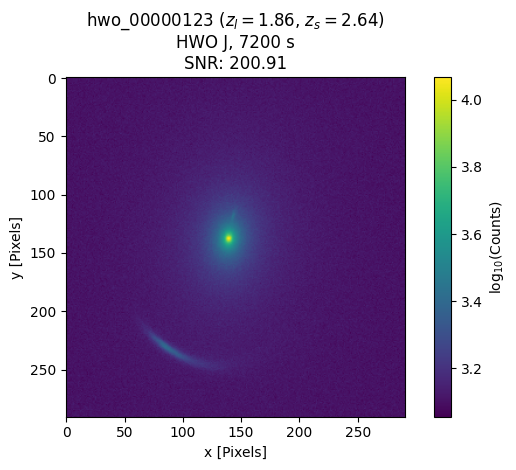

In [4]:
sample = util.unpickle(pickles[0])
sample.plot(show_snr=True)

In [5]:
from mejiro.analysis.snr_calculation import get_snr

snr, masked_snr_array = get_snr(sample, verbose=True)

Using structure
[[0 1 0]
 [1 1 1]
 [0 1 0]]
Identified 2 region(s)
Region 1: SNR = 31.63758516459291
Region 2: SNR = 200.91253028741343


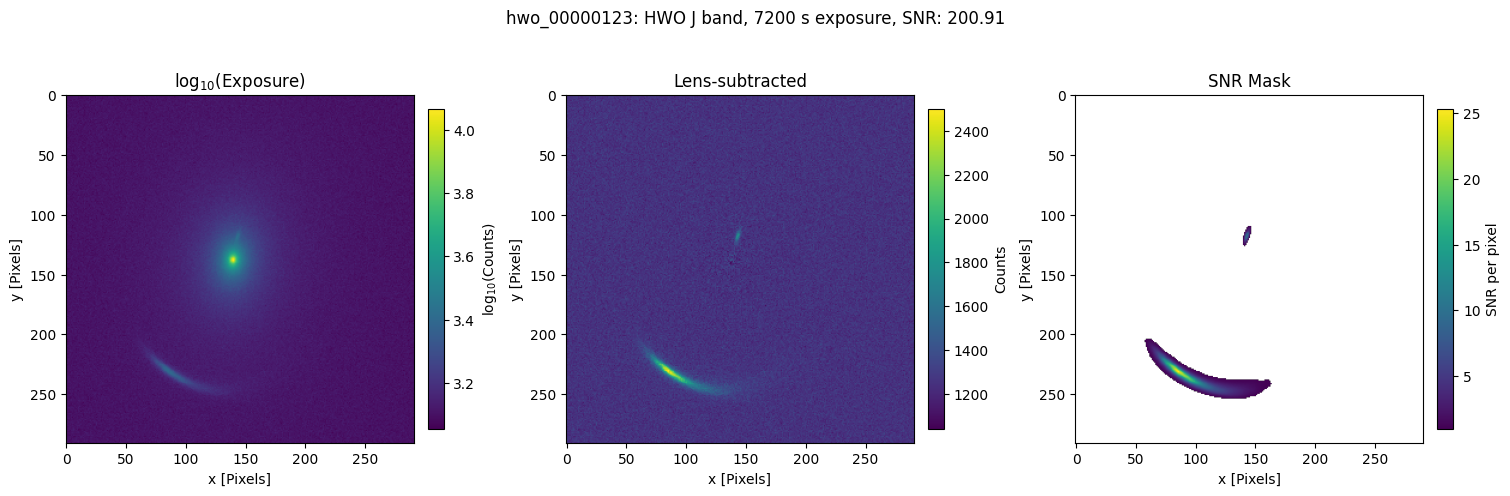

In [6]:
show_snr = True

_, ax = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)
im0 = ax[0].imshow(np.log10(sample.exposure))
im1 = ax[1].imshow(sample.exposure - sample.lens_exposure)
im2 = ax[2].imshow(masked_snr_array)

cbar0 = plt.colorbar(im0, ax=ax[0], fraction=0.046, pad=0.04)
cbar0.set_label(r'log$_{10}$(Counts)')

cbar1 = plt.colorbar(im1, ax=ax[1], fraction=0.046, pad=0.04)
cbar1.set_label(r'Counts')

cbar2 = plt.colorbar(im2, ax=ax[2], fraction=0.046, pad=0.04)
cbar2.set_label(r'SNR per pixel')

ax[0].set_title(r'log$_{10}$(Exposure)')
ax[1].set_title('Lens-subtracted')
ax[2].set_title('SNR Mask')

for a in ax:
    a.set_xlabel('x [Pixels]')
    a.set_ylabel('y [Pixels]')

title = f'{sample.synthetic_image.strong_lens.name}: {sample.synthetic_image.instrument_name} {sample.synthetic_image.band} band, {sample.exposure_time} s exposure'
if show_snr:
    snr = sample.get_snr()
    title += f', SNR: {snr:.2f}'
plt.suptitle(title)

plt.show()

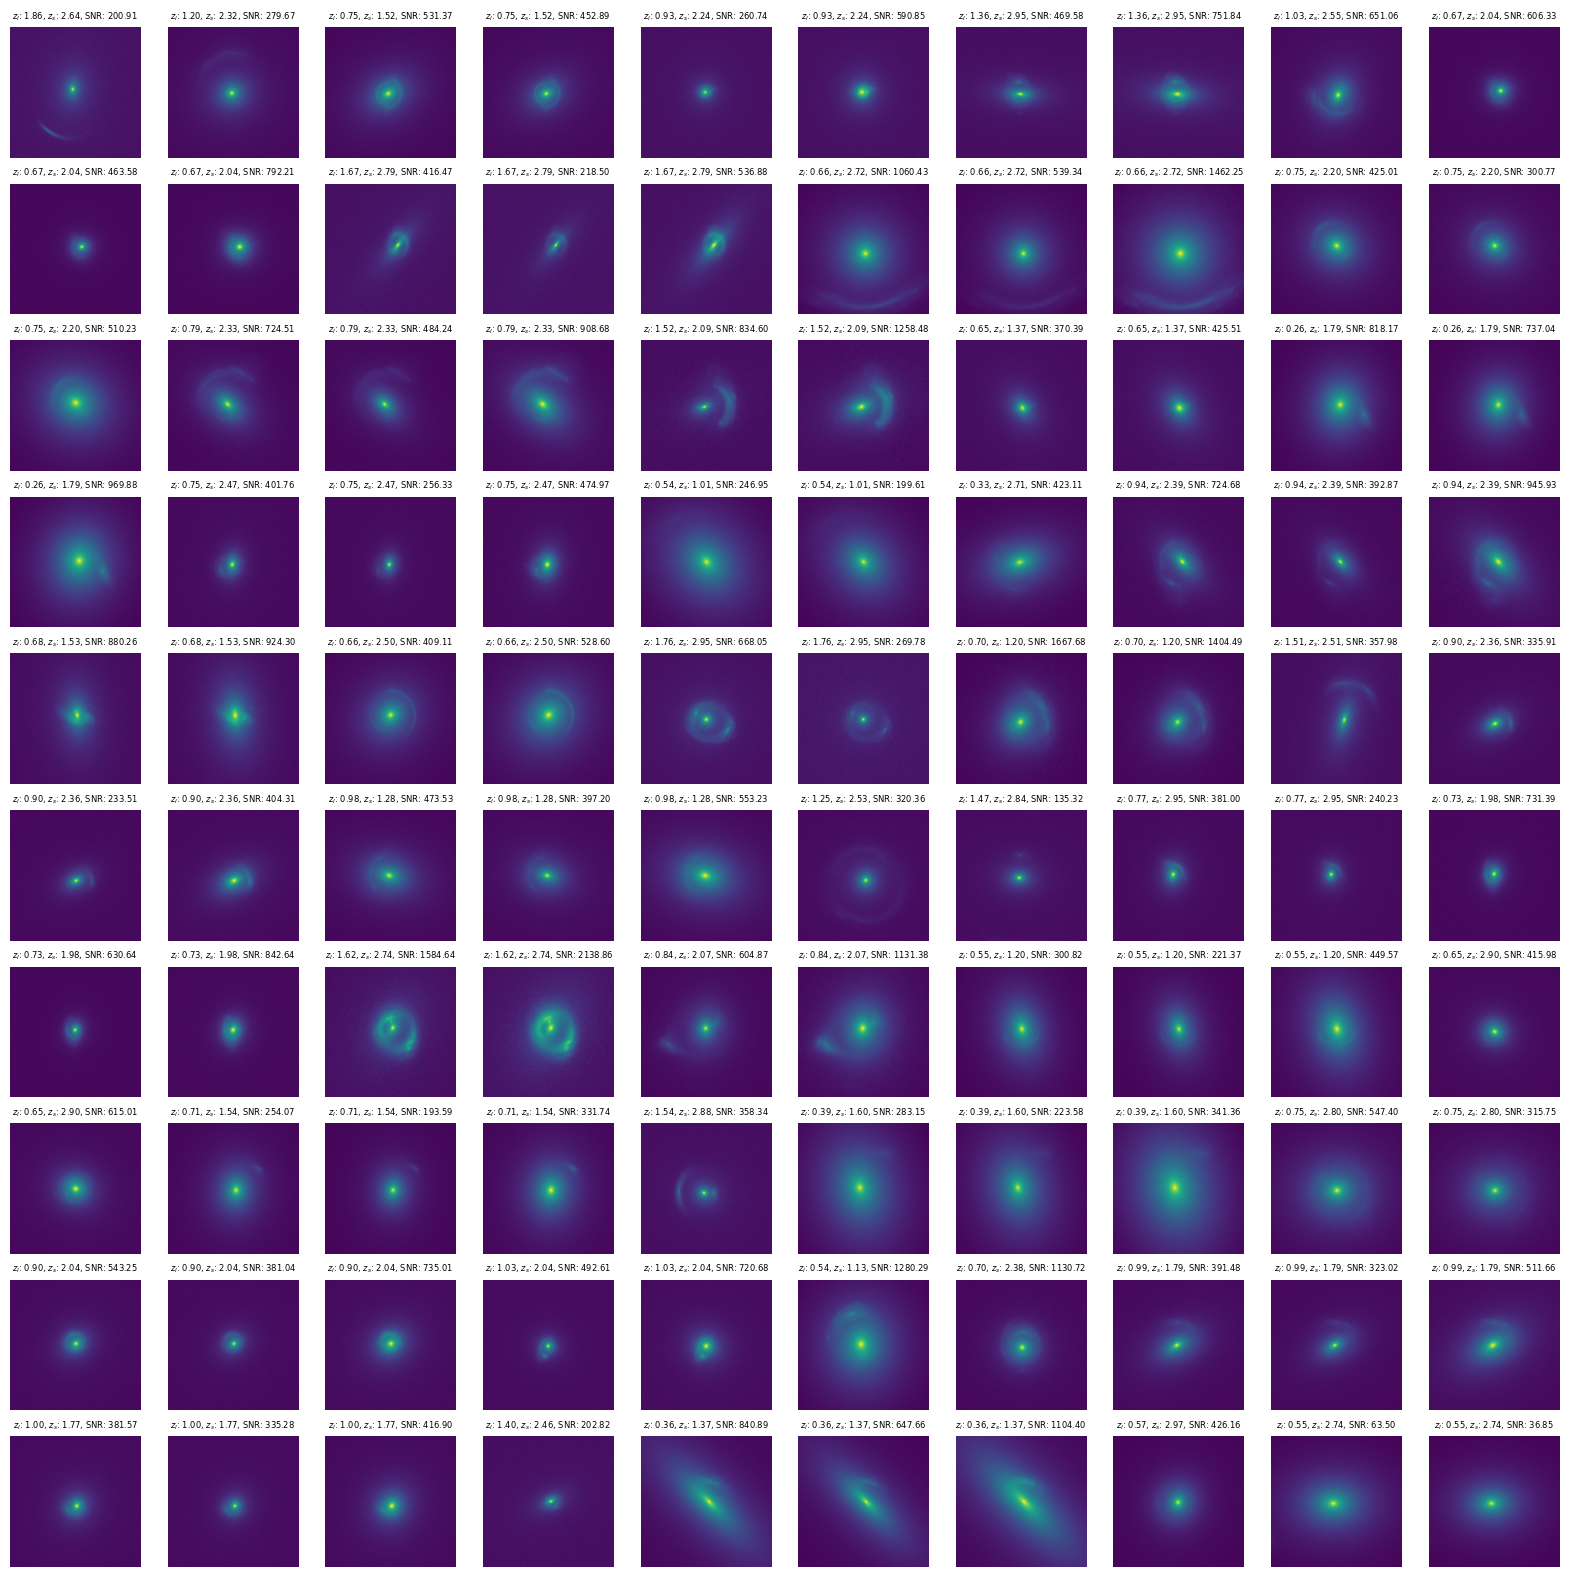

In [9]:
_, ax = plt.subplots(10, 10, figsize=(20, 20))

for i in range(100):
    sample = util.unpickle(pickles[i])
    snr = sample.get_snr()

    ax.flat[i].imshow(np.log10(sample.exposure))
    ax.flat[i].axis('off')
    ax.flat[i].set_title(f'$z_l$: {sample.synthetic_image.strong_lens.z_lens:.2f}, $z_s$: {sample.synthetic_image.strong_lens.z_source:.2f}, SNR: {snr:.2f}', fontsize=6)

plt.show()